# **Momento de Retroalimentación: Módulo 2 Implementación de una técnica de aprendizaje máquina sin el uso de un framework. (Portafolio Implementación)**

## **Instrucciones**

**Entregable:** Uso de framework o biblioteca de aprendizaje máquina para la implementación de una solución.

1. Crea un repositorio de GitHub para este proyecto.
Programa uno de los algoritmos vistos en el módulo (o que tu profesor de módulo autorice) haciendo uso de una biblioteca o framework de aprendizaje máquina. Lo que se busca es que demuestres tu conocimiento sobre el framework y como configurar el algoritmo.
2. Prueba tu implementación con un set de datos y realiza algunas predicciones.
3. Las predicciones las puedes correr en consola o las puedes implementar con una interfaz gráfica apoyándote en los visto en otros módulos.
4. Después de la entrega intermedia se te darán correcciones que puedes incluir en tu entrega final.

## **Acerca de los datos...**

Elegí este dataset debido a que me intrigó un poco el desempeño de las películas de superhérores, en concreto las de Marvel, debido a que estas actualmente se encuentran en un gran declive y si las comparamos con las películas de hace no muchos años, presentaban mejores resultados en cuanto a recaudaciones y opiniones populares. Para este entregable, he optado por elegir los datos relacionados a las ganancias generadas durante el fin de semana de apertura y el segundo fin de semana, ya que en primera instancia debe existir una relación en base al recibimiento del público durante la primera semana y la segunda.

### **¿Qué se espera hacer con este dataset?**

Más que nada, quiero generar una predicción o estimación de datos entre la primera y segunda semana de recaudación ($MUSD). Esto con el fin de poner en práctica los conocimientos adquiridos durante estas semanas de clases acerca de modelos de Machine Learning.

### **¿Qué modelo se utilizará?**

Para esta entrega, se hará uso de un framework o librería para implementar un algoritmo de ML de Redes Neuronales, del cual se esperan mejores resultados que la entrega pasada, que consistió en implementar un modelo de regresión polinomial.

Así como se realizó en la entrega pasada, también se tomarán en cuenta los primeros 20 datos de la columna "opening weekend" para entrenamiento, y los últimos 10 datos se destinarán para generar estimaciones con respecto a la columna "second weekend". Es así que comprobaremos si el algoritmo logra estimar las recaudaciones que se generarán el segundo fin de semana de apertura de las películas de Marvel.

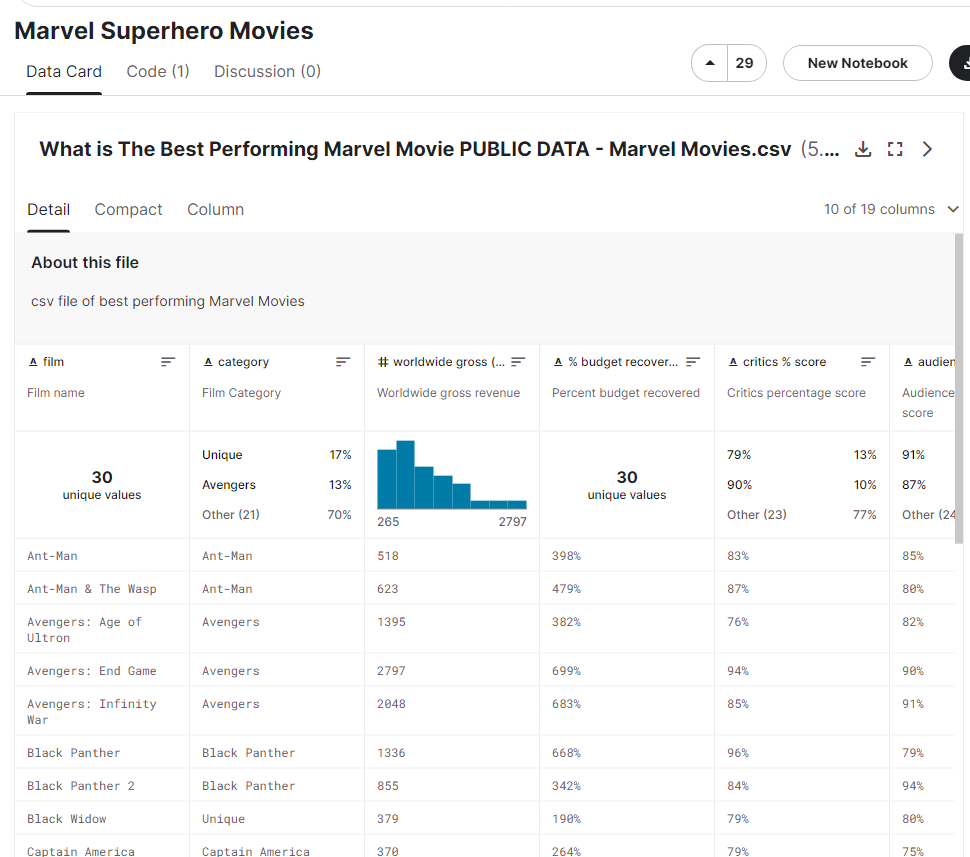

## **Antes de empezar**
Lo primero que debemos hacer es cargar los datos (listas) y librerías, esto incluye el framework con el que se trabajará, en este caso es SciKitLearn. Para ello, debemos:

Ejecutar esta celda solo si estas utilizando Google Colab. Se deberá subir el archivo CSV a nuestro Drive y montarlo dentro de Colab:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importar bibliotecas

Para este entregable ahora podemos implementar más de las librerías que se encuentran relacionadas con implementación de modelos de Machine Learning, en este caso usaremos SKLearn para implementar redes neuronales:

In [2]:
# Importamos tensorflow como herramienta de apoyo para la implementación de keras y scikitLearn
import tensorflow as tf
# Importamos Keras
from tensorflow import keras
# Importamos la funcion train_test_split() para dividir los datos de entrada
from sklearn.model_selection import train_test_split
# Importamos la función de StandardScaler para estandarizar los datos de entrada
from sklearn.preprocessing import StandardScaler
# Importamos las funciones de mean_squared_error y mean_absolute_error para evaluar el rendimiento del modelo posterior a la predicción
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Importamos librerías adicionales para el tratamiento y proyección de los datos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable

Colocamos la ruta dónde se encuentra el archivo CSV y cargamos los datos:

In [3]:
# Editar el path de ser necesario
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Marvel_Movies.csv')

## Extraemos los datos de interés y los dividimos por segmentos

In [4]:
# Extraemos las columnas con datos para generar una predicción:
# Lista con todos los valores de la variable independiente
X = data[['opening weekend ($m)'][:len(data)//2]]
# Lista con todos los valores de la variable dependiente
y = data[['second weekend ($m)'][:len(data)//2]]

# Dividimos los datos en sets de entrenamiento y pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizamos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Construimos la Red Neuronal
El modelo se conforma de 4 capas, la capa de entrada conformada de 25 neuronas, 50 para la segunda, 70 para la tercera y una última de la capa de salida:

In [5]:
model = keras.Sequential([
    keras.layers.Dense(25, activation='tanh', input_shape=(1,)), # Capa de entrada con 25 neuronas, función de activación "tanh" y una variable de entrada
    keras.layers.Dense(50, activation='tanh'), # Segunda Capa con 50 neuronas y una función de activación "tanh"
    keras.layers.Dense(70, activation='relu'), # Tercer capa con 70 neuronas y una función de activación "relu"
    keras.layers.Dense(1) # Capa de salida con una neurona
])

# Compilamos el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

## Entrenamos el modelo
Entrenamos la red neuronal con el set de entrenamiento de datos. Después de probar distintos tipos de variables, encontré que por lo menos el batch_size tiene que ser pequeño y 100 iteraciones son necesarias para obtener un buen resultado (evidentemente con la configuración previamente determinado):

In [6]:
model.fit(X_train_scaled, y_train, epochs=100, batch_size=4)

Epoch 1/100
6/6 [==============================] - 1s 4ms/step - loss: 4689.8208
Epoch 2/100
6/6 [==============================] - 0s 2ms/step - loss: 4657.6094
Epoch 3/100
6/6 [==============================] - 0s 3ms/step - loss: 4619.6094
Epoch 4/100
6/6 [==============================] - 0s 3ms/step - loss: 4576.5454
Epoch 5/100
6/6 [==============================] - 0s 3ms/step - loss: 4531.0923
Epoch 6/100
6/6 [==============================] - 0s 3ms/step - loss: 4476.6567
Epoch 7/100
6/6 [==============================] - 0s 2ms/step - loss: 4410.2598
Epoch 8/100
6/6 [==============================] - 0s 3ms/step - loss: 4329.6177
Epoch 9/100
6/6 [==============================] - 0s 3ms/step - loss: 4226.3330
Epoch 10/100
6/6 [==============================] - 0s 3ms/step - loss: 4115.3276
Epoch 11/100
6/6 [==============================] - 0s 3ms/step - loss: 3970.0076
Epoch 12/100
6/6 [==============================] - 0s 3ms/step - loss: 3835.3977
Epoch 13/100
6/6 [=======

## Realizamos predicciones
Utilizamos el modelo entrenado para realizar las predicciones con respecto a los datos de prueba (X_test_scaled):

In [7]:
second_wknd_pred = model.predict(X_test_scaled)
print("Predictions:", second_wknd_pred)

1/1 [==============================] - 0s 115ms/step
Predictions: [[66.60422 ]
 [36.94662 ]
 [28.546875]
 [26.313465]
 [30.3873  ]
 [89.283844]]


## Evaluamos el modelo
Comprobamos el rendimiento de la red neuronal con el set de entrenamiento, en este caso utilizamos el MSE y MAE para medir el nivel de error que obtuvo el modelo de los valores estimados con respecto a los valores reales:

In [8]:
# Calculamos las métricas de regresión
mse = mean_squared_error(y_test, second_wknd_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, second_wknd_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 165.10867537631734
Root Mean Squared Error: 12.849462065639843
Mean Absolute Error: 11.149221865336102


## Gráfica de Comparación
Graficamos los datos de "Opening Weekend (MUSD)" y "Second Weekend (MUSD)" originales que son parte del conjunto de pruebas (que es utilizado para generar las predicciones del modelo) con respecto a los datos originales de "Opening Weekend (MUSD)" con las predicciones de "Second Weekend (MUSD)":

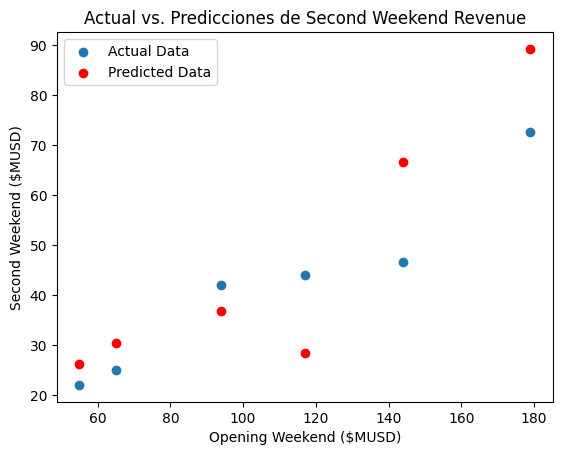

In [9]:
# Graficamos los datos originales
plt.scatter(X_test, y_test, label='Actual Data')

# Graficamos los datos estimados por la red neuronal
plt.scatter(X_test, second_wknd_pred, color='red', label='Predicted Data')

plt.xlabel('Opening Weekend ($MUSD)')
plt.ylabel('Second Weekend ($MUSD)')
plt.title('Actual vs. Predicciones de Second Weekend Revenue')
plt.legend()
plt.show()

## Tabla Comparativa de Visualización de Datos
Dentro de esta tabla se comparan los datos que se utilizaron para entrenamiento, en específico podemos encontrar los valores de la recaudación de apertura contra los valores de recaudación de la segunda semana junto a sus respectivas predicciones elaboradas por el algoritmo de redes neuronales:

In [10]:
# Convert second_wknd_pred ndarray to a pandas Series
second_wknd_pred_series = pd.Series(second_wknd_pred.flatten())

# Create a PrettyTable instance
table = PrettyTable()
table.field_names = ["opening weekend ($m)", "second weekend ($m)", "Predicted 2nd Weekend ($MUSD)"]

# Iterate through the rows and add data to the table
for x, y_true, y_pred in zip(X_test.values, y_test.values, second_wknd_pred_series):
    table.add_row([x[0], y_true[0], y_pred])

# Print the table
print(table)

+----------------------+---------------------+-------------------------------+
| opening weekend ($m) | second weekend ($m) | Predicted 2nd Weekend ($MUSD) |
+----------------------+---------------------+-------------------------------+
|        144.0         |         46.6        |       66.60421752929688       |
|         94.0         |         42.1        |       36.94662094116211       |
|        117.0         |         44.0        |           28.546875           |
|         55.0         |         22.1        |       26.313465118408203      |
|         65.0         |         25.0        |       30.387300491333008      |
|        179.0         |         72.6        |       89.28384399414062       |
+----------------------+---------------------+-------------------------------+


## Conclusión
Estuve experimentando bastante con los parámetros que podía modificar de la red neuronal, más que nada empecé a cambiar los valores de *epoch* (cantidad de iteraciones), la cantidad de neuronas de cada capa (decidí dejar la cantidad de capas fija en 4), en inclusive probé varias funciones de activación, sin embargo no obtuve valores de predicción aproximados a los valores reales de la segunda semana de recaudación de las películas, además, los valores de MSE y MAE eran bastante grandes (el MSE llegaba hasta valores aproximados de 1000).

Ahí es cuando decidí cambiar el *batch_size* a un valor menor del que tenía. Al inicio tenía un valor de 32, lo cual considero no era muy útil para que las redes neuronales aprendieran por cada iteración, y es por ello que recibía o valores muy bajos entre 0 y 10, o valores constantes que en realidad no variaban casi nada, o ambas. Reduje el *batch_size* a 5, lo que representa un valor más generoso a utilizar por cada iteración, esto debido a que de por si el dataset es muy pequeño, ahora si tomamos solamente el apartado de X_test lo hace aún más pequeño. Aplicando este último cambio y al jugar con los valores de *epoch*, la cantidad de neuronas y las funciones de activación, me di cuenta que los valores estimados resultaron ser más aproximados a los valores reales y sus errores se habían disminuido bastante, dejando de ser constantes y valores bajos, volviendolo más preciso.

Al final estuve jugando un poco más con los parámteros anteriormente mencionados, y he llegado a la conclusión de que, al menos para este algoritmo de redes neuronales, se ocupa un batch_size pequeño, bstantes iteraciones, al menos 4 capas ocultas aparte de las capas de entrada y salida, y bastantes neuronas en cada una de estas capas. Al menos estos son los valores que pude obtener para un rendimiento bastante decente del modelo, no aseguro que proporcione datos precisos, al igual que el algoritmo de regresió polinomial, esto es muy experimental y evidentemente a falta de un análisis profundo del comportamiento y lógica del algoritmo me es más difícil llegar a valores precisos, más no es que haya colocado valores sin sentido, conservé cierta lógica y razonamiento de cómo funcionan las redes neuronales en base a lo visto en material y explicaciones durante clase.

Estos son los parámetros utilizados y uno de mis mejores resultados utilizando en algoritmo:


### Construcción del Modelo
Esta es la configuración del modelo que mejor me funcionó, 3 capas con 25, 50 y 70 neuronas respectivamente aparte de la salida con una neurona:
```
model = keras.Sequential([
    keras.layers.Dense(25, activation='tanh', input_shape=(1,)), # Capa de entrada con 25 neuronas, función de activación "tanh" y una variable de entrada
    keras.layers.Dense(50, activation='tanh'), # Segunda capa con 50 neuronas y una función de activación "tanh"
    keras.layers.Dense(70, activation='relu'), # Tercer capa con 70 neuronas y una función de activación "relu"
    keras.layers.Dense(1) # Capa de salida con una neurona
])

# Compilamos el modelo
model.compile(optimizer='adam', loss='mean_squared_error')
```

### Entrenamiento del modelo
Los mejores valores que encontré para entrenamiento son 100 iteraciones y batch_size de 4:
```
model.fit(X_train_scaled, y_train, epochs=100, batch_size=4)
```

### Resultados de Evaluación del Modelo
Obtuve valores más pequeños, teniendo el MSE con un valor alrededor de 30, el RMSE era de 5 aproximadamente y el MAE de 3, pero esto puede variar por la función de split() al ejecutar el código en ocasiones distintas:
* **Mean Squared Error:** 51.305606632642935
* **Root Mean Squared Error:** 7.162793214427102
* **Mean Absolute Error:** 5.628341801961263

### Gráfica Comparativa (Predicción vs Datos Reales)
Esta gráfica es de los mejores resultados que obtuve al experimentar con las variables que pude modificar de las redes neuronales. Como dije anteriormente, es posible obtener mejores resultados debido a que la función split() cambia los valores que conforman el conjunto tanto de entrenamiento como de pruebas, más sigue siendo la misma base de datos de películas, al ser aleatorio el orden es el que cambia:

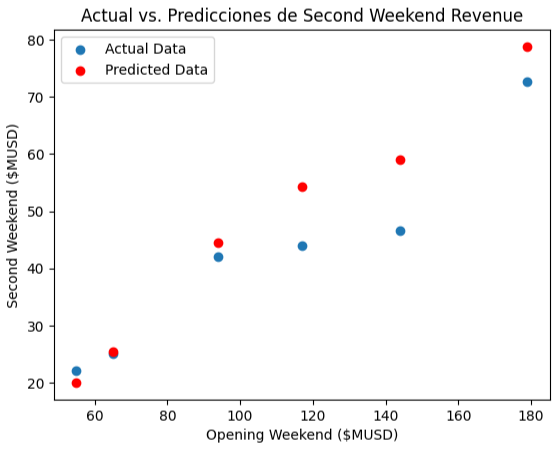